# Classification Case Study: Titanic Crash Survival
Problem Statement: "Create a Predictive model which can tell whether a given person will survive the Titanic crash or not?"
* Target Variable: Survival
* Predictors: Age, Gender, Tavel Class, Fare etc.

In [1]:
#Classification case study
# Reading the Titanic Survival Data
# Reading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TitanicSurvivalData=pd.read_csv(r'TitanicSurvivalData.csv')
TitanicSurvivalData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Looking at the number of rows and columns
TitanicSurvivalData.shape

(891, 12)

In [4]:
# Removing duplicate rows if any
TitanicSurvivalData=TitanicSurvivalData.drop_duplicates()
TitanicSurvivalData.shape

(891, 12)

In [5]:
#Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
TitanicSurvivalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
TitanicSurvivalData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#Removing useless columns from the data
UselessColumns=['PassengerId','Name','Ticket','Cabin']
TitanicSurvivalData=TitanicSurvivalData.drop(UselessColumns,axis=1)
TitanicSurvivalData.shape

(891, 8)

In [8]:
# Looking at the statistial distribution of the data
TitanicSurvivalData.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observe the distribution of target variable
 * When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes


<Axes: xlabel='Survived'>

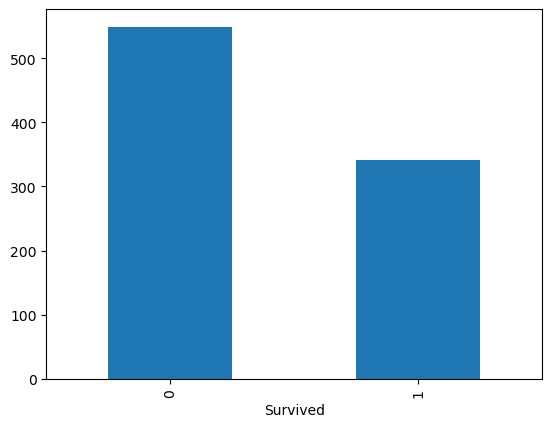

In [9]:
# Observing the distribution of target variable
%matplotlib inline
Groupdata=TitanicSurvivalData.groupby('Survived').size()
Groupdata.plot(kind='bar')

In [10]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
TitanicSurvivalData.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

### Visualize distribution of all the categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

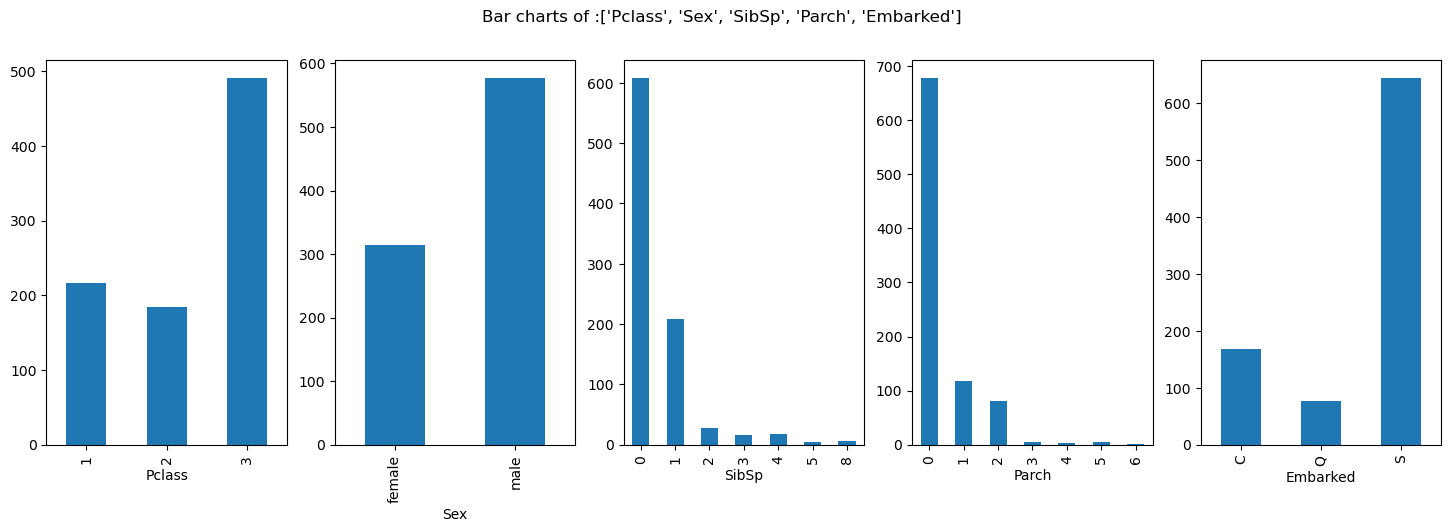

In [11]:
def PlotCategorical(InpData,cols):
    %matplotlib inline
    fig,subplot=plt.subplots(nrows=1,ncols=len(cols),figsize=(18,5))
    fig.suptitle('Bar charts of :'+ str(cols))
    
    for col,plotnumber in zip(cols,range(len(cols))):
        InpData.groupby(col).size().plot(kind='bar',ax=subplot[plotnumber])

PlotCategorical(TitanicSurvivalData,['Pclass', 'Sex','SibSp','Parch','Embarked'])        

### Visualize distribution of all the numeric Predictor variables in the data using histograms

array([[<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

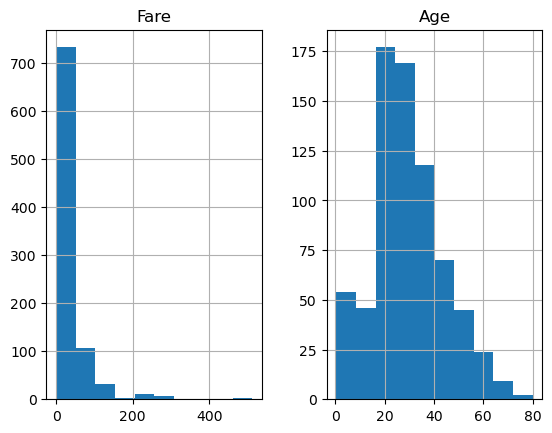

In [12]:
#Visualizing all numeric predictor var in data using histogram
TitanicSurvivalData[['Fare','Age']].hist()

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Bar Plot, Box Plot
* Categorical Vs Categorical---- Bar Plot

## Statistical measurement of relationship between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

### Relationship exploration: Categorical Vs Continuous
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

#### Visualizing the relation between Survived and Fare using bar charts
We Group by and keep categorical variable in the X-Axis and the continuous variable in the Y-Axis

In [13]:
GroupedData=TitanicSurvivalData.groupby('Survived')[['Age','Fare']]
GroupedData.mean()

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


<Axes: xlabel='Survived'>

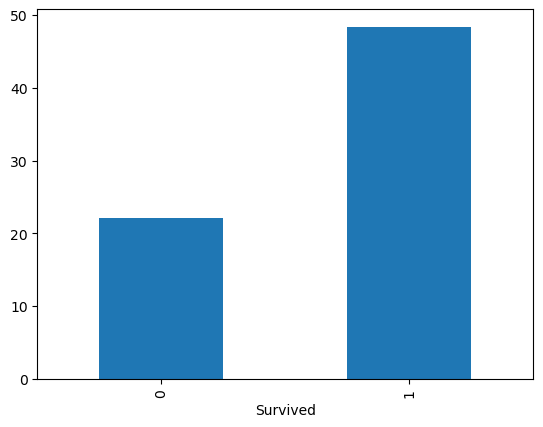

In [14]:
# Creating the graph with Price
# You can observice that many people who survived has paid higher fares!
GroupedData.mean()['Fare'].plot(kind='bar')

#### Looking at the variances in Fare by each Survival type in box plot
IF the distribution of each type is similar, it gives a hint that there is no correlation Between the categorical and the numeric variable

<Axes: title={'center': 'Fare'}, xlabel='Survived'>

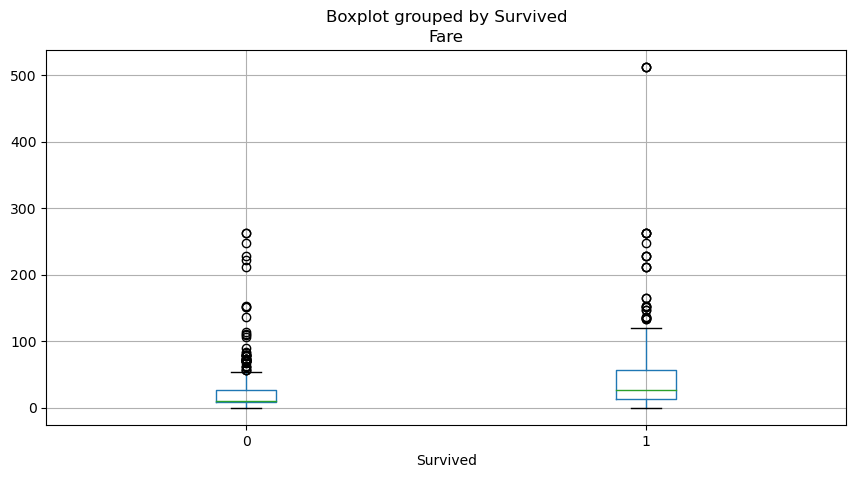

In [15]:
#Box plot for Categorical Variable Survived Vs Continuous Variable Fare
# Observe the outlier in Fare for Survived=1
TitanicSurvivalData.boxplot(column='Fare',by='Survived',figsize=(10,5),vert=True)

In [16]:
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']>300]=263
TitanicSurvivalData

C:\Users\Wrlcome\AppData\Local\Temp\ipykernel_7320\1463478596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']>300]=263


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<Axes: title={'center': 'Fare'}, xlabel='Pclass'>

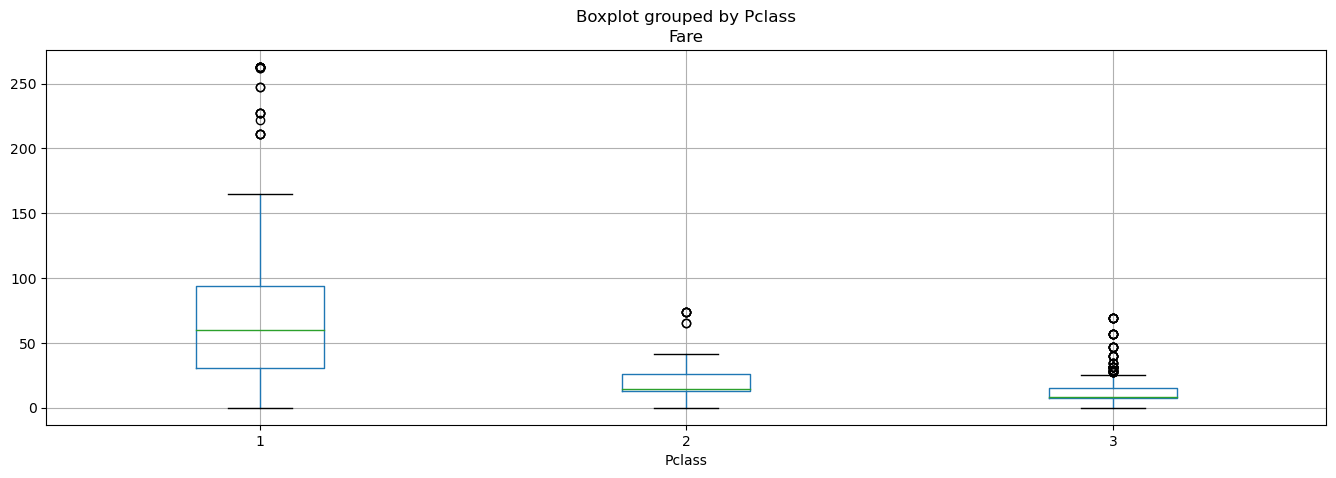

In [17]:
# As the outlier is on the higher side
# We observe what kind of fares have been paid by people travelling in Passenger Pclass=1
# This gives an idea about what is a typical high Fare paid by people
# We replace the Fare of outlier rows with this typical fare value of Class=1
# In this case it seems like Fare=263
TitanicSurvivalData.boxplot(column='Fare', by='Pclass',figsize=(16,5))

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [18]:
#Categorical VS Continous Relationship
from scipy.stats import f_oneway
CategoryGroupList=TitanicSurvivalData.groupby('Survived')['Fare'].apply(list)
AnnovaTest=f_oneway(*CategoryGroupList)
print('P value :',AnnovaTest[1])


P value : 1.8421954983111479e-16


In [19]:
#Checking is there any null value becuse if we perform annova teston a column having null value , it will show nan
TitanicSurvivalData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
#Hence Treating the null values of age column so we can perform annova test
 #Treating missing values in each column

############################ Continuous Variables #############################################

# Replacing missing values by interpolation for a numeric variable
TitanicSurvivalData['Age']=TitanicSurvivalData['Age'].interpolate(method='linear')

In [21]:
TitanicSurvivalData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [22]:
CategoryGroupList2=TitanicSurvivalData.groupby('Survived')['Age'].apply(list)
AnnovaTest1=f_oneway(*CategoryGroupList2)
print('P value :',AnnovaTest1[1])

P value : 0.06363050984571512


In [23]:
############################ Categorical Variables ############################################

# Replacing with interpolation for a categorical variable
TitanicSurvivalData['Embarked']=TitanicSurvivalData['Embarked'].interpolate(method='bfill')

In [24]:
TitanicSurvivalData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [25]:
CrossTabResult=pd.crosstab(index=TitanicSurvivalData['Sex'], columns=TitanicSurvivalData['Survived'])
CrossTabResult

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex'>

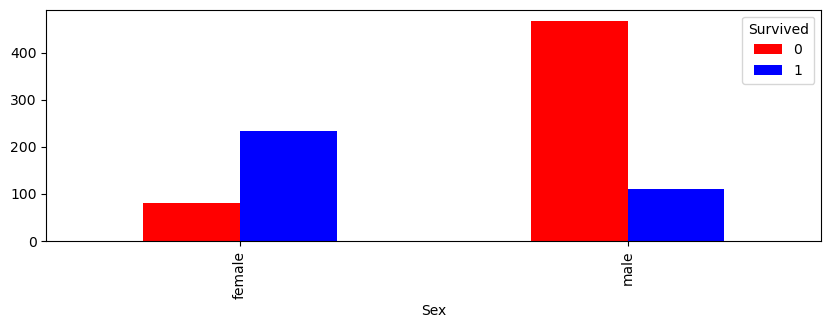

In [55]:
CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

In [56]:
from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrossTabResult)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
# In this case it is way way lower than 0.05 Hence, we reject H0
# this means the two columns are correlated with each other and Gender of a person affects the Survival
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.1973570627755645e-58


In [57]:
CrossTabResult1=pd.crosstab(index=TitanicSurvivalData['Pclass'], columns=TitanicSurvivalData['Survived'])
CrossTabResult1

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Pclass'>

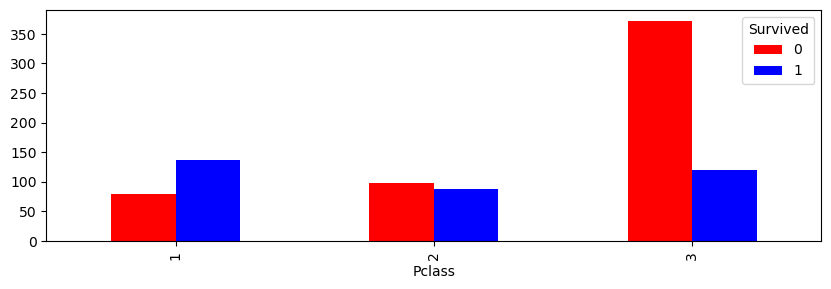

In [58]:
CrossTabResult1.plot.bar(figsize=(10,3), color=['red','blue'])


In [59]:
from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult1 = chi2_contingency(CrossTabResult1)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
# In this case it is way way lower than 0.05 Hence, we reject H0
# this means the two columns are correlated with each other and Gender of a person affects the Survival
print('The P-Value of the ChiSq Test is:', ChiSqResult1[1])

The P-Value of the ChiSq Test is: 4.549251711298793e-23


In [60]:
CrossTabResult2=pd.crosstab(index=TitanicSurvivalData['SibSp'], columns=TitanicSurvivalData['Survived'])
CrossTabResult2

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<Axes: xlabel='SibSp'>

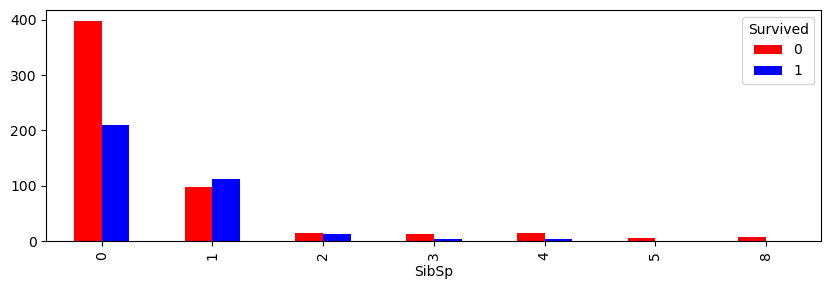

In [61]:
CrossTabResult2.plot.bar(figsize=(10,3), color=['red','blue'])

In [62]:
from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult2 = chi2_contingency(CrossTabResult2)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
# In this case it is way way lower than 0.05 Hence, we reject H0
# this means the two columns are correlated with each other and Gender of a person affects the Survival
print('The P-Value of the ChiSq Test is:', ChiSqResult2[1])

The P-Value of the ChiSq Test is: 1.5585810465902147e-06


In [63]:
CrossTabResult3=pd.crosstab(index=TitanicSurvivalData['Embarked'], columns=TitanicSurvivalData['Survived'])
CrossTabResult3

Survived,0,1
Embarked,,
C,75,94
Q,47,30
S,427,218


<Axes: xlabel='Embarked'>

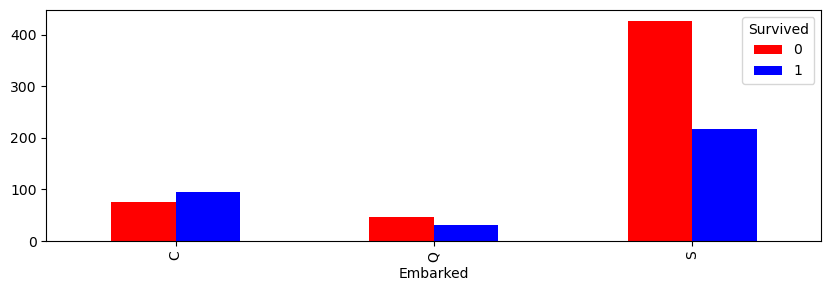

In [64]:
CrossTabResult3.plot.bar(figsize=(10,3),color=['red','blue'])

In [65]:

# Performing Chi-sq test
ChiSqResult3= chi2_contingency(CrossTabResult3)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
# In this case it is way way lower than 0.05 Hence, we reject H0
# this means the two columns are correlated with each other and Gender of a person affects the Survival
print('The P-Value of the ChiSq Test is:', ChiSqResult3[1])

The P-Value of the ChiSq Test is: 1.3868367679916751e-06


In [26]:
TitanicSurvivalData.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Data Pre-processing for Machine Learning
List of steps performed before data can be used for machine learning
1. Treating Missing Values (Interpolate/Replace with median/Mode values)
2. Treating Outliers (Delete or replace with nearby logical value)
3. Converting each Ordinal Categorical columns to numeric
4. Converting all nominal Categorical columns to numeric
5. Data Transformation (Optional): Standardization/Normalization/log/sqrt

In [1]:
#We have treated missing values before doing Testing 
# Referring to the bar charts plotted earlier for all the categorical columns, there are no outliers
# Referring to the histograms plotted earlier for all the continuous columns, there was outlier in the Fare column
# Fare column is already treated for the outlier above

### Data Pre-Processing: Converting Categorical data to numeric
1. First Treat all Ordinal variables by manually mapping the numeric values
2. Treat all nominal variables using dummy variables

In [27]:
#Checking unique values in sex column
TitanicSurvivalData['Sex'].unique()


array(['male', 'female'], dtype=object)

In [28]:
# Treating nominal variable Sex first, as it is a binary variable.
TitanicSurvivalData['Sex'].replace({'male':1,'female':0},inplace=True)

In [29]:
TitanicSurvivalData.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [30]:
# Treating all the nominal variables at once using dummy variables
TitanicSurvivalDataNumeric=pd.get_dummies(TitanicSurvivalData,dtype=int)
TitanicSurvivalDataNumeric

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,22.5,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


In [31]:
# Saving the processed data as a pickle file
TitanicSurvivalDataNumeric.to_pickle('TitanicSurvivalDataNumeric.pkl')

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [32]:
# Printing all the column names for our reference
TitanicSurvivalDataNumeric.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [33]:
# Separate Target Variable and Predictor Variables 
Tar_var='Survived'
Predicted_var=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_C', 'Embarked_Q', 'Embarked_S']

In [34]:
# Split the data into training and testing set
X=TitanicSurvivalDataNumeric[Predicted_var].values
y=TitanicSurvivalDataNumeric[Tar_var].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 9)
(268, 9)
(623,)
(268,)


#### Logistic Regression

In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
LR=LogisticRegression(C=1,penalty='l2',solver='newton-cg')
# Printing all the parameters of logistic regression
LR

LogisticRegression(C=1, solver='newton-cg')

In [37]:
# Creating the model on Training Data
CLF=LR.fit(X_train,y_train)
y_pred=CLF.predict(X_test)

In [38]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

# Printing the Overall Accuracy of the model
F1_score=metrics.classification_report(y_test,y_pred).split()[-2]
print('Accuracy :',F1_score)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

[[137  20]
 [ 30  81]]
Accuracy : 0.81


In [39]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predicted_var)
TestingDataResults[Tar_var]=y_test
TestingDataResults['Predicted'+ Tar_var]=y_pred
TestingDataResults.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1


##### Decision Trees

In [40]:
#Decision Tree Clf
from sklearn import tree
#choose from different tunable hyper parameters
clf=tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')
# Printing all the parameters of Decision Trees
clf

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [41]:
# Creating the model on Training Data
Dtree=clf.fit(X_train,y_train)
y_pred=Dtree.predict(X_test)


In [42]:
# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test,y_pred).split()[-2]
print('Accuracy:',F1_Score)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       157
           1       0.85      0.62      0.72       111

    accuracy                           0.80       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.81      0.80      0.79       268

[[145  12]
 [ 42  69]]
Accuracy: 0.79


In [43]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predicted_var)
TestingDataResults[Tar_var]=y_test
TestingDataResults['Predicted'+ Tar_var]=y_pred
TestingDataResults.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1


<Axes: >

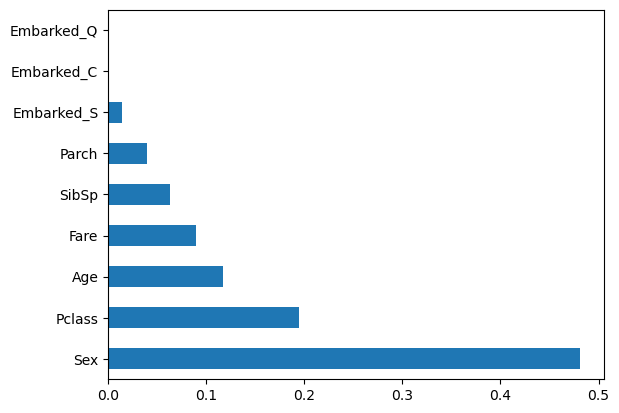

In [44]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(Dtree.feature_importances_, index=Predicted_var)
feature_importances.nlargest(10).plot(kind='barh')

#### Rrandom Forest 

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200)
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       157
           1       0.88      0.65      0.75       111

    accuracy                           0.82       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.83      0.82      0.81       268

[[147  10]
 [ 39  72]]
Accuracy : 0.81
Axes(0.125,0.11;0.775x0.77)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,PredictionSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
263,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,1,0
264,1.0,1.0,20.5,0.0,0.0,0.0000,0.0,0.0,1.0,0,0
265,1.0,1.0,65.0,0.0,0.0,26.5500,0.0,0.0,1.0,0,0
266,3.0,1.0,17.0,0.0,0.0,8.6625,0.0,0.0,1.0,0,0


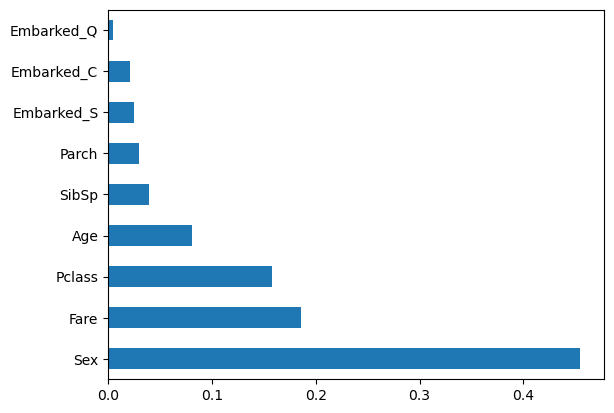

In [45]:
#Random Forest Regressor
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=3,n_estimators=200,criterion='entropy')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RFC=clf.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

# Printing the Overall Accuracy of the model
F1_score=metrics.classification_report(y_test,y_pred).split()[-2]
print('Accuracy :',F1_score)

# Plotting the feature importance for Top 10 most important columns
feature_importances=pd.Series(RFC.feature_importances_,index=Predicted_var)
print(feature_importances.nlargest(10).plot(kind='barh'))

# Printing some sample values of prediction
PredictedDF=pd.DataFrame(data=X_test,columns=Predicted_var)
PredictedDF[Tar_var]=y_test
PredictedDF['Prediction'+ Tar_var]=y_pred
PredictedDF

#### Ada Boost

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.06, n_estimators=100)


C:\Users\Wrlcome\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       157
           1       0.78      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

[[135  22]
 [ 32  79]]
Accuracy : 0.80
Axes(0.125,0.11;0.775x0.77)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
263,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,1,0
264,1.0,1.0,20.5,0.0,0.0,0.0000,0.0,0.0,1.0,0,0
265,1.0,1.0,65.0,0.0,0.0,26.5500,0.0,0.0,1.0,0,0
266,3.0,1.0,17.0,0.0,0.0,8.6625,0.0,0.0,1.0,0,0


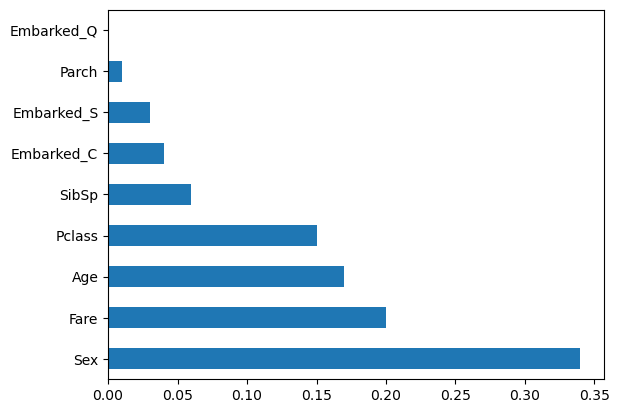

In [46]:
#Ada Boost Reg
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf=AdaBoostClassifier(n_estimators=100,estimator=DTC,learning_rate=0.06)

# Printing all the parameters of Adaboost     
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
y_pred=AB.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

# Printing the Overall Accuracy of the model
F1_score=metrics.classification_report(y_test,y_pred).split()[-2]
print('Accuracy :',F1_score)

# Plotting the feature importance for Top 10 most important columns
feature_importances=pd.Series(AB.feature_importances_,index=Predicted_var)
print(feature_importances.nlargest(10).plot(kind='barh'))


# Printing some sample values of prediction
PredictedDF=pd.DataFrame(data=X_test,columns=Predicted_var)
PredictedDF[Tar_var]=y_test
PredictedDF['Predicted'+Tar_var]=y_pred
PredictedDF

#### KNN

In [49]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=2)

# Printing all the parameters of KNN
clf

KNeighborsClassifier(n_neighbors=2)

In [50]:

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
y_pred=AB.predict(X_test)


# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

# Printing the Overall Accuracy of the model
F1_score=metrics.classification_report(y_test,y_pred).split()[-2]
print('Accuracy :',F1_score)

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
PredictedDF=pd.DataFrame(data=X_test,columns=Predicted_var)
PredictedDF[Tar_var]=y_test
PredictedDF['Predicted'+Tar_var]=y_pred
PredictedDF

KNeighborsClassifier(n_neighbors=2)
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       157
           1       0.73      0.29      0.41       111

    accuracy                           0.66       268
   macro avg       0.69      0.61      0.59       268
weighted avg       0.68      0.66      0.62       268

[[145  12]
 [ 79  32]]
Accuracy : 0.62


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,0
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
263,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,1,0
264,1.0,1.0,20.5,0.0,0.0,0.0000,0.0,0.0,1.0,0,0
265,1.0,1.0,65.0,0.0,0.0,26.5500,0.0,0.0,1.0,0,0
266,3.0,1.0,17.0,0.0,0.0,8.6625,0.0,0.0,1.0,0,0


#### SVM

In [51]:
# Support Vector Machines(SVM)
from sklearn import svm
clf=svm.SVC(C=20,kernel='rbf',gamma=0.01)

# Printing all the parameters of SVM
clf

SVC(C=20, gamma=0.01)

In [52]:
# Creating the model on Training Data

AB=clf.fit(X_train,y_train)
y_pred=AB.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

# Printing the Overall Accuracy of the model
F1_score=metrics.classification_report(y_test,y_pred).split()[-2]
print('Accuracy :',F1_score)

# Printing some sample values of prediction
PredictedDF=pd.DataFrame(data=X_test,columns=Predicted_var)
PredictedDF[Tar_var]=y_test
PredictedDF['Predicted'+Tar_var]=y_pred
PredictedDF

SVC(C=20, gamma=0.01)
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       157
           1       0.76      0.65      0.70       111

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268

[[134  23]
 [ 39  72]]
Accuracy : 0.77


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
263,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,1,0
264,1.0,1.0,20.5,0.0,0.0,0.0000,0.0,0.0,1.0,0,0
265,1.0,1.0,65.0,0.0,0.0,26.5500,0.0,0.0,1.0,0,0
266,3.0,1.0,17.0,0.0,0.0,8.6625,0.0,0.0,1.0,0,0


#### Naive Bayes

In [53]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB,MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf=GaussianNB()

# Printing all the parameters of Naive Bayes
clf

GaussianNB()

In [54]:
print(clf)

AB=clf.fit(X_train,y_train)
y_pred=AB.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

# Printing the Overall Accuracy of the model
F1_score=metrics.classification_report(y_test,y_pred).split()[-2]
print('Accuracy :',F1_score)


# Printing some sample values of prediction
PredictedDF=pd.DataFrame(data=X_test,columns=Predicted_var)
PredictedDF[Tar_var]=y_test
PredictedDF['Predicted'+Tar_var]=y_pred
PredictedDF

GaussianNB()
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       157
           1       0.68      0.80      0.74       111

    accuracy                           0.76       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.76      0.77       268

[[116  41]
 [ 22  89]]
Accuracy : 0.77


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,1
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
263,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,1,0
264,1.0,1.0,20.5,0.0,0.0,0.0000,0.0,0.0,1.0,0,0
265,1.0,1.0,65.0,0.0,0.0,26.5500,0.0,0.0,1.0,0,0
266,3.0,1.0,17.0,0.0,0.0,8.6625,0.0,0.0,1.0,0,0
